In [32]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 276us/step - loss: 0.2904 - acc: 0.9087 - val_loss: 0.0630 - val_acc: 0.9800
Epoch 2/12
60000/60000 [==============================] - 16s 270us/step - loss: 0.0879 - acc: 0.9725 - val_loss: 0.0364 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 17s 285us/step - loss: 0.0680 - acc: 0.9788 - val_loss: 0.0333 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 26s 437us/step - loss: 0.0573 - acc: 0.9823 - val_loss: 0.0275 - val_acc: 0.9909
Epoch 5/12
60000/60000 [==============================] - 31s 516us/step - loss: 0.0485 - acc: 0.9857 - val_loss: 0.0260 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 31s 516us/step - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0258 - val_acc: 0.9917
Epoch 7/12
60000/60000 [===================

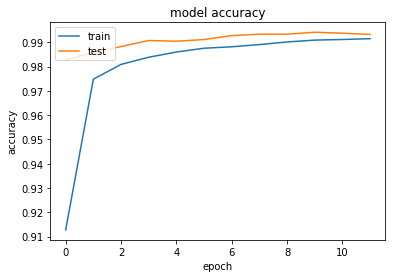

In [3]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
history.history['acc']

[0.9011500000317891,
 0.9732999999682108,
 0.9800666666984558,
 0.9832333333015442,
 0.9854833333015441,
 0.9865666666348776,
 0.9881166666666666,
 0.9884166666666667,
 0.9895333333015441,
 0.99055,
 0.9911666666984558,
 0.9909666666666667]

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
__________

In [33]:
import numpy as np
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()
num_6=x_test[np.where(y_test1 == 6)[0][0]]
num_8=x_test[np.where(y_test1 == 8)[0][0]]
avg_num=(np.array(num_6) + np.array(num_8)) / 2

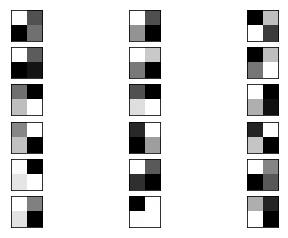

In [57]:
#These weights are the filter learned by the CNN. 

from matplotlib import pyplot
# load the model
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
# get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [39]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(avg_num.reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1


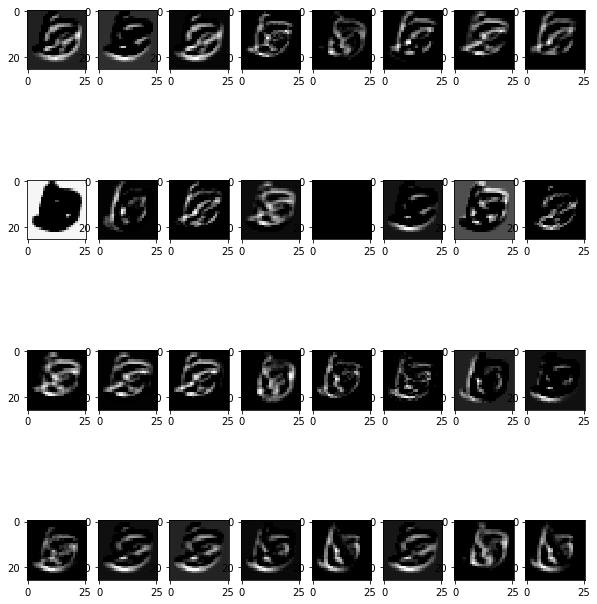

In [45]:
display_activation(activations, 8, 4, 0)

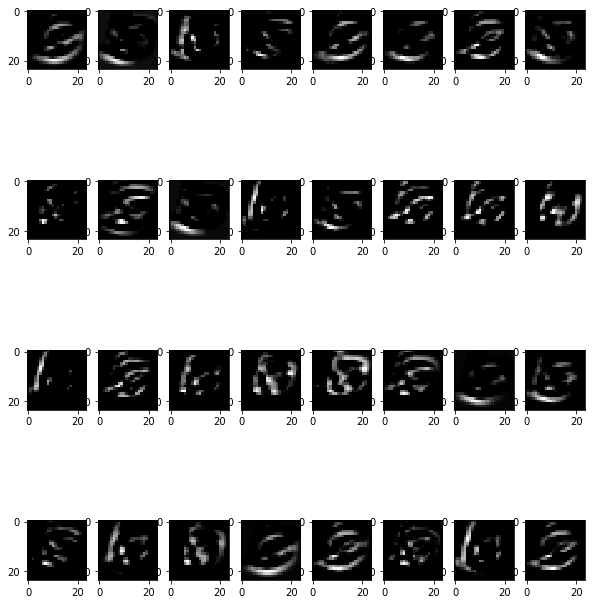

In [48]:
display_activation(activations, 8, 4, 1)

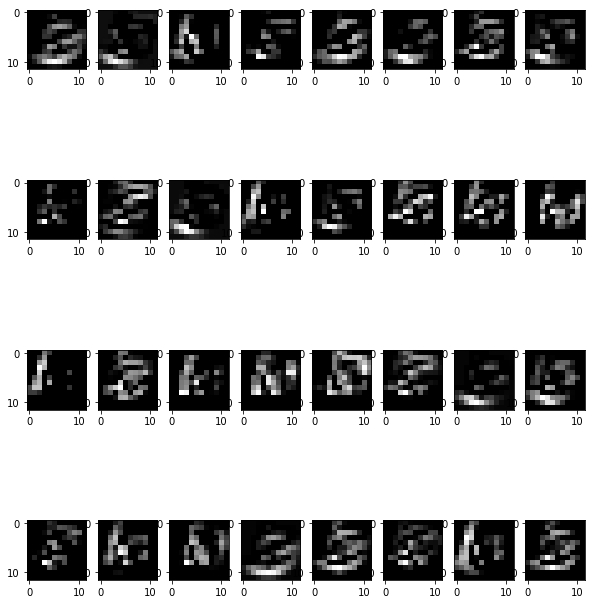

In [49]:
display_activation(activations, 8, 4, 2)

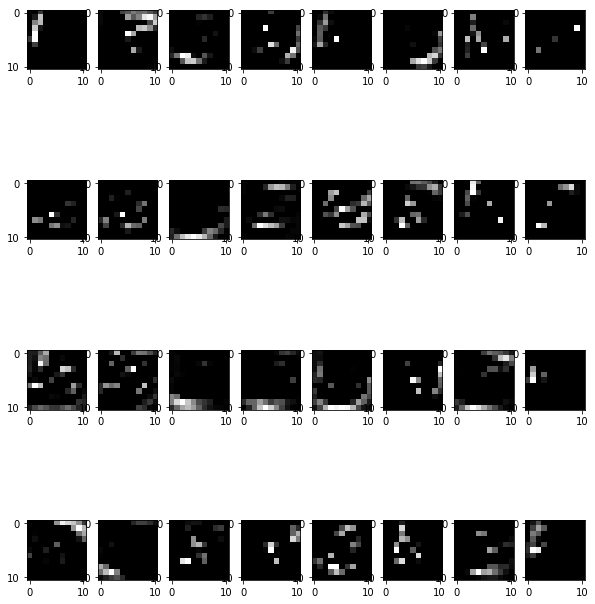

In [50]:
display_activation(activations, 8, 4, 4)

In [58]:
model.predict_classes(avg_num.reshape(1,28,28,1))

array([8], dtype=int64)